In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.integrate as scpi
from scipy.signal import butter, lfilter, hilbert

In [47]:
#parametros da simulação
T = 0.1
ts = 0.0001
fc = 250
fs = 1/0.0001
N = int(T*fs) #número de pontos
t  = np.linspace(0,N-1,N)*ts # Tempo t


# Considere a mensagem
![equação1](eq.jpg)

em que T = 0.1 s. Considerando um sinal de portadora centrado em 250 Hz,
e assumindo um desvio de frequência kf = 100



1. Obtenha o gráfico da mensagem m(t) com tempo de
amostragem ts = 0.1 ms e da sua integral.

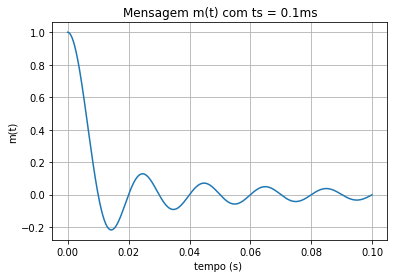

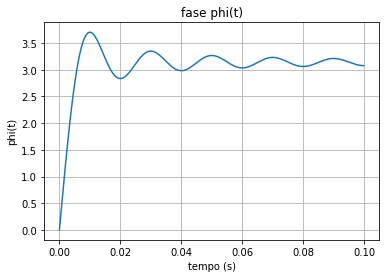

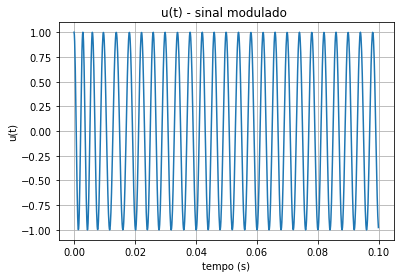

In [48]:
#sinal m(t)
m_t =np.sinc(100*t)
plt.plot(t,m_t)
plt.grid()
plt.title("Mensagem m(t) com ts = 0.1ms")
plt.xlabel("tempo (s) ")
plt.ylabel("m(t)")
plt.show()

#portadora
kf = 100
phi_t = 2*np.pi*kf*scpi.cumtrapz(m_t,t,initial=0) #fase phi(t) para sinal FM
plt.plot(t,phi_t)
plt.grid()
plt.xlabel('tempo (s)')
plt.ylabel('phi(t)')
plt.title('fase phi(t)')
plt.show()

#sinal mensagem u(t)
u_t = np.cos(2*np.pi*fc*t + phi_t)
plt.plot(t,u_t)
plt.grid()
plt.xlabel('tempo (s)')
plt.ylabel('u(t)')
plt.title('u(t) - sinal modulado ')
plt.show()


**Integral da mensagem m(t) modulada:**

$$ u(t)=cos(2\pi fct + 2\pi kf \int_{-\infty}^{t} m({\tau})\,d(\tau )) $$


2. Computar o espectro de frequência de m(t)

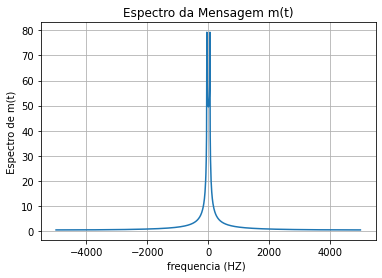

In [56]:
#espectro de m(t)
M_F = np.fft.fftshift(np.fft.fft(m_t)) #espectro de m(t)
plt.plot(f,np.abs(M_F))
plt.grid()
plt.xlabel('frequencia (HZ) ')
plt.ylabel(' Espectro de m(t) ')
plt.title('Espectro da Mensagem m(t)')
plt.show()

In [ ]:

U_F = np.fft.fftshift(np.fft.fft(u_t)) #espectro de frequencia da mensagem
f  = np.linspace(-fs/2,fs/2,N)
plt.plot(f,np.abs(U_F))
plt.grid()
plt.xlabel('frequencia (HZ) ')
plt.ylabel(' Espectro de u(t)')
plt.title("Espectro do Sinal Modulado")
plt.show()




3. Utilizando osciladores locais e um filtro passa-baixa com
frequências de corte em 125Hz, demodule o sinal FM e compare
a mensagem original com a mensagem demodulada sobrepondo o dois
gráficos. Assuma que o sinal recebido é dado por
$$r(t) = u(t) + n(t)$$
em que, u(t) é o sinal modulado em frequência e n(t) é um processo
aleatório de média zero e variância σ
2
. Comente o que acontece quando
σ com os sinal demodulado quando σ = {0.1, 1}.


In [ ]:
Wc=np.random.randn(1000)
Ws=np.random.randn(1000)
sgma=0.1 #sigma = 0.1

#r(t) = u(t) + n(t)

#r_t_A é a função com sigma = 0.1

r_t_A = u_t + sgma * (Wc*np.cos(2*np.pi*fc*t))-( Ws*np.sin(2*np.pi*fc*t)) 
R_F_A = np.fft.fftshift(np.fft.fft(r_t_A))
f  = np.linspace(-fs/2,fs/2,N)
plt.plot(f,np.abs(R_F_A))
plt.grid()
plt.xlabel('frequencia (HZ) ')
plt.ylabel(' Espectro de R(t) sigma = 0.1')
plt.title("R(T)")
plt.show()


#demodulação

#osciladores locais 
c_t = np.cos(2*np.pi*fc*t)
s_t =np.sin(2*np.pi*fc*t)

# fase
u_i_A =r_t_A * c_t + np.imag(hilbert(r_t_A))*s_t
#a transformada de hilbert é um filtro defasador, np.imag para extrair a parte complexa
#quadratura
u_q_A = np.imag(hilbert(r_t_A))* c_t - r_t_A*s_t

#sinal de banda báscia
u_l_A =u_i_A + 1j*u_q_A
phase_inst_A =np.unwrap(np.arctan2(u_q_A,u_i_A))
freq_inst_A = np.diff(phase_inst_A)/(2*np.pi*kf*ts) #np,diff faz a diferença entre os pontos, mas para ser a aproximaçao da derivada tempop temos que dividir por delta T no caso o tempo de amostragem ts
plt.plot(t[0:N-1],freq_inst_A,label="Sinal Demodulado (Banda básica)")

#na derida o freq_inst fica faltando um ponto ai o t tem que ter menos 1 ponto para o plot de 0 até N-1
plt.plot(t,m_t, label="Sinal m(t)")
plt.grid()
plt.xlabel('tempo (s)')
plt.ylabel('frequencia instanea instanea')
plt.legend(loc=1)
plt.title("SIGMA = 0.1")
plt.show()


#sigma = 1
sgma =1
r_t_B = u_t + sgma * (Wc*np.cos(2*np.pi*fc*t))-( Ws*np.sin(2*np.pi*fc*t)) 
R_F_B = np.fft.fftshift(np.fft.fft(r_t_B))
f  = np.linspace(-fs/2,fs/2,N)
plt.plot(f,np.abs(R_F_B))
plt.grid()
plt.xlabel('frequencia (HZ) ')
plt.ylabel(' Espectro de R(t)')
plt.title("R(T) sigma = 1")
plt.show()

# fase
u_i = r_t_B*c_t + np.imag(hilbert(r_t_B))*s_t
#a transformada de hilbert é um filtro defasador, np.imag para extrair a parte complexa
#quadratura
u_q = np.imag(hilbert(r_t_B))*c_t - r_t_B*s_t

#sinal de banda báscia
u_l =u_i + 1j*u_q
phase_inst_B =np.unwrap(np.arctan2(u_q,u_i))
freq_inst_B = np.diff(phase_inst_B)/(2*np.pi*kf*ts) #np,diff faz a diferença entre os pontos, mas para ser a aproximaçao da derivada tempop temos que dividir por delta T no caso o tempo de amostragem ts
plt.plot(t[0:N-1],freq_inst_B,label="Sinal Demodulado(Banda básica)")

#na derida o freq_inst fica faltando um ponto ai o t tem que ter menos 1 ponto para o plot de 0 até N-1
plt.plot(t,m_t, label="Sinal m(t)")
plt.grid()
plt.xlabel('tempo (s)')
plt.ylabel('frequencia instanea instanea')
plt.legend(loc=1)
plt.title("SIGMA = 1")
plt.show()

In [ ]:

#demodulação com filtro passabaixa
def butter_lowpass(cutoff, fs, order=6):
    nyq = 0.5 * fs
    normal_cutoff = cutoff / nyq
    b, a = butter(order, normal_cutoff, btype='low', analog=False)
    return b, a

def butter_lowpass_filter(data, cutoff, fs, order=6):
    b, a = butter_lowpass(cutoff, fs, order=order)
    y = lfilter(b, a, data)
    return y


In [ ]:
cutoff = 125 #frequencia de corte em 125Hz

In [ ]:
#demodulação com sigma = 0.1
hat_u_i_A = butter_lowpass_filter(r_t_A*c_t,cutoff,fs)
hat_u_q_A = butter_lowpass_filter(r_t_A*s_t,cutoff,fs)
phase_inst_A = np.unwrap(np.arctan2(hat_u_q,hat_u_i))
freq_inst_A = np.diff(phase_inst)/(2*np.pi*kf*ts)

#demodulação com sigma = 1
hat_u_i_B = butter_lowpass_filter(r_t_B*c_t,cutoff,fs)
hat_u_q_B = butter_lowpass_filter(r_t_B*s_t,cutoff,fs)
phase_inst_A = np.unwrap(np.arctan2(hat_u_q,hat_u_i))
freq_inst_A = np.diff(phase_inst)/(2*np.pi*kf*ts)


In [ ]:
plt.plot(t[0:N-1],freq_inst_A,label="Freq de Corte = 125 sigma= 0.1")
#plt.plot(t[0:N-1],freq_inst_B,label="Freq de Corte = 125 sigma=1")
plt.plot(t,m_t,'-', label="sinal m(t)")
plt.grid()
plt.legend(loc=1)
plt.xlabel('tempo (s)')
plt.ylabel('frequencia instanea instanea')
plt.title("Sinais demodulados X sinal m(t)")
plt.show()


#plt.plot(t[0:N-1],freq_inst_A,label="Freq de Corte = 125 sigma= 0.1")
plt.plot(t[0:N-1],freq_inst_B,label="Freq de Corte = 125 sigma=1")
plt.plot(t,m_t,'-', label="sinal m(t)")
plt.grid()
plt.legend(loc=1)
plt.xlabel('tempo (s)')
plt.ylabel('frequencia instanea instanea')
plt.title("Sinais demodulados X sinal m(t)")
plt.show()

4. Faça uma tabela com valores computados da variância de n(t) e das componentes de fase e quadratura.

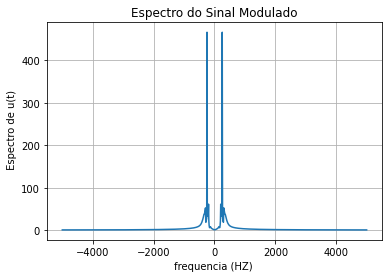

In [58]:
4. Faça uma tabela com valores computados da variância de n(t) e das componentes de fase e quadratura.

3. Utilizando osciladores locais e um filtro passa-baixa com
frequências de corte em 125Hz, demodule o sinal FM e compare
a mensagem original com a mensagem demodulada sobrepondo o dois
gráficos. Assuma que o sinal recebido é dado por
$$r(t) = u(t) + n(t)$$
em que, u(t) é o sinal modulado em frequência e n(t) é um processo
aleatório de média zero e variância σ
2
. Comente o que acontece quando
σ com os sinal demodulado quando σ = {0.1, 1}.


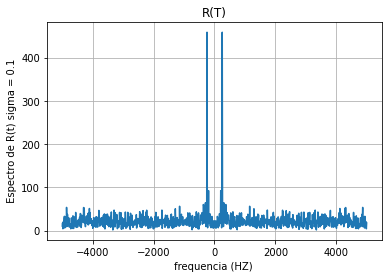

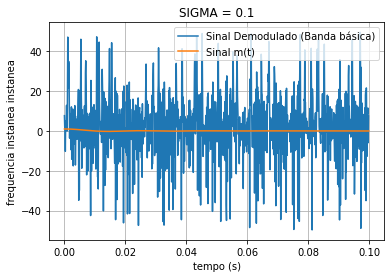

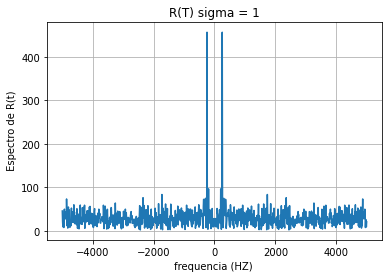

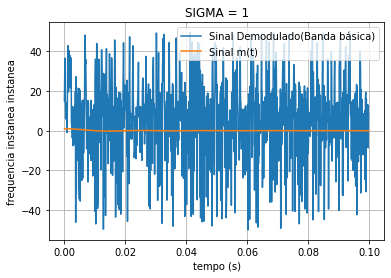

In [115]:
Wc=np.random.randn(1000)
Ws=np.random.randn(1000)
sgma=0.1 #sigma = 0.1

#r(t) = u(t) + n(t)

#r_t_A é a função com sigma = 0.1

r_t_A = u_t + sgma * (Wc*np.cos(2*np.pi*fc*t))-( Ws*np.sin(2*np.pi*fc*t)) 
R_F_A = np.fft.fftshift(np.fft.fft(r_t_A))
f  = np.linspace(-fs/2,fs/2,N)
plt.plot(f,np.abs(R_F_A))
plt.grid()
plt.xlabel('frequencia (HZ) ')
plt.ylabel(' Espectro de R(t) sigma = 0.1')
plt.title("R(T)")
plt.show()


#demodulação

#osciladores locais 
c_t = np.cos(2*np.pi*fc*t)
s_t =np.sin(2*np.pi*fc*t)

# fase
u_i_A =r_t_A * c_t + np.imag(hilbert(r_t_A))*s_t
#a transformada de hilbert é um filtro defasador, np.imag para extrair a parte complexa
#quadratura
u_q_A = np.imag(hilbert(r_t_A))* c_t - r_t_A*s_t

#sinal de banda báscia
u_l_A =u_i_A + 1j*u_q_A
phase_inst_A =np.unwrap(np.arctan2(u_q_A,u_i_A))
freq_inst_A = np.diff(phase_inst_A)/(2*np.pi*kf*ts) #np,diff faz a diferença entre os pontos, mas para ser a aproximaçao da derivada tempop temos que dividir por delta T no caso o tempo de amostragem ts
plt.plot(t[0:N-1],freq_inst_A,label="Sinal Demodulado (Banda básica)")

#na derida o freq_inst fica faltando um ponto ai o t tem que ter menos 1 ponto para o plot de 0 até N-1
plt.plot(t,m_t, label="Sinal m(t)")
plt.grid()
plt.xlabel('tempo (s)')
plt.ylabel('frequencia instanea instanea')
plt.legend(loc=1)
plt.title("SIGMA = 0.1")
plt.show()


#sigma = 1
sgma =1
r_t_B = u_t + sgma * (Wc*np.cos(2*np.pi*fc*t))-( Ws*np.sin(2*np.pi*fc*t)) 
R_F_B = np.fft.fftshift(np.fft.fft(r_t_B))
f  = np.linspace(-fs/2,fs/2,N)
plt.plot(f,np.abs(R_F_B))
plt.grid()
plt.xlabel('frequencia (HZ) ')
plt.ylabel(' Espectro de R(t)')
plt.title("R(T) sigma = 1")
plt.show()

# fase
u_i = r_t_B*c_t + np.imag(hilbert(r_t_B))*s_t
#a transformada de hilbert é um filtro defasador, np.imag para extrair a parte complexa
#quadratura
u_q = np.imag(hilbert(r_t_B))*c_t - r_t_B*s_t

#sinal de banda báscia
u_l =u_i + 1j*u_q
phase_inst_B =np.unwrap(np.arctan2(u_q,u_i))
freq_inst_B = np.diff(phase_inst_B)/(2*np.pi*kf*ts) #np,diff faz a diferença entre os pontos, mas para ser a aproximaçao da derivada tempop temos que dividir por delta T no caso o tempo de amostragem ts
plt.plot(t[0:N-1],freq_inst_B,label="Sinal Demodulado(Banda básica)")

#na derida o freq_inst fica faltando um ponto ai o t tem que ter menos 1 ponto para o plot de 0 até N-1
plt.plot(t,m_t, label="Sinal m(t)")
plt.grid()
plt.xlabel('tempo (s)')
plt.ylabel('frequencia instanea instanea')
plt.legend(loc=1)
plt.title("SIGMA = 1")
plt.show()

In [103]:

#demodulação com filtro passabaixa
def butter_lowpass(cutoff, fs, order=6):
    nyq = 0.5 * fs
    normal_cutoff = cutoff / nyq
    b, a = butter(order, normal_cutoff, btype='low', analog=False)
    return b, a

def butter_lowpass_filter(data, cutoff, fs, order=6):
    b, a = butter_lowpass(cutoff, fs, order=order)
    y = lfilter(b, a, data)
    return y


In [106]:
cutoff = 125 #frequencia de corte em 125Hz

In [116]:
#demodulação com sigma = 0.1
hat_u_i_A = butter_lowpass_filter(r_t_A*c_t,cutoff,fs)
hat_u_q_A = butter_lowpass_filter(r_t_A*s_t,cutoff,fs)
phase_inst_A = np.unwrap(np.arctan2(hat_u_q,hat_u_i))
freq_inst_A = np.diff(phase_inst)/(2*np.pi*kf*ts)

#demodulação com sigma = 1
hat_u_i_B = butter_lowpass_filter(r_t_B*c_t,cutoff,fs)
hat_u_q_B = butter_lowpass_filter(r_t_B*s_t,cutoff,fs)
phase_inst_A = np.unwrap(np.arctan2(hat_u_q,hat_u_i))
freq_inst_A = np.diff(phase_inst)/(2*np.pi*kf*ts)


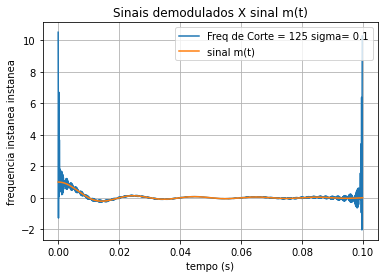

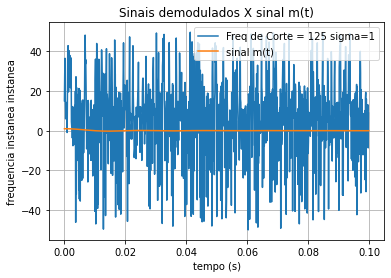

In [121]:
plt.plot(t[0:N-1],freq_inst_A,label="Freq de Corte = 125 sigma= 0.1")
#plt.plot(t[0:N-1],freq_inst_B,label="Freq de Corte = 125 sigma=1")
plt.plot(t,m_t,'-', label="sinal m(t)")
plt.grid()
plt.legend(loc=1)
plt.xlabel('tempo (s)')
plt.ylabel('frequencia instanea instanea')
plt.title("Sinais demodulados X sinal m(t)")
plt.show()


#plt.plot(t[0:N-1],freq_inst_A,label="Freq de Corte = 125 sigma= 0.1")
plt.plot(t[0:N-1],freq_inst_B,label="Freq de Corte = 125 sigma=1")
plt.plot(t,m_t,'-', label="sinal m(t)")
plt.grid()
plt.legend(loc=1)
plt.xlabel('tempo (s)')
plt.ylabel('frequencia instanea instanea')
plt.title("Sinais demodulados X sinal m(t)")
plt.show()

4. Faça uma tabela com valores computados da variância de n(t) e das componentes de fase e quadratura.